Para la imagen suministrada “eyes” (por ninguna razón en especial, con heterocromía), implementar un algoritmo que:
1. Encuentre la posición de los iris en cada par de ojos y mida su distancia en píxeles.

2. Encuentre la posición de las pupilas en cada par de ojos y mida su distancia en píxeles.

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [2]:
img = cv.imread('/home/raul/Documentos/UBA/Visión por computadora 1/Clase 4/TP3/eyes.jpg')
img_gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [3]:
img_gray_suave=cv.medianBlur(img_gray,3) # puede ser 3, 5, 7

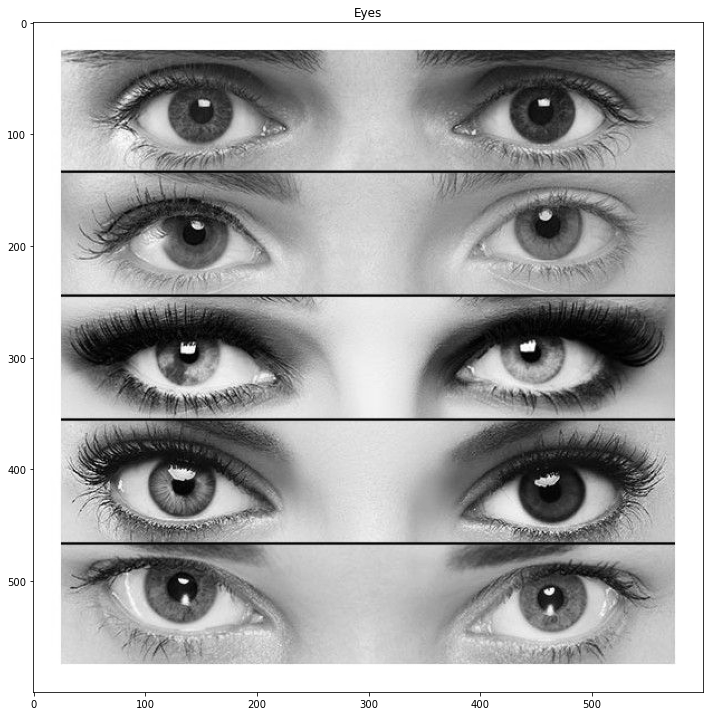

In [4]:
figura = plt.figure(figsize = (12,20))
plt.title('Eyes')
plt.imshow(img_gray,cmap='gray')
#cv.imshow('eyes',img_gray)
#cv.waitKey(0)
#cv.destroyAllWindows()

Distancia  1  en pixeles entre iris =  307
Distancia  2  en pixeles entre iris =  306
Distancia  3  en pixeles entre iris =  338
Distancia  4  en pixeles entre iris =  340


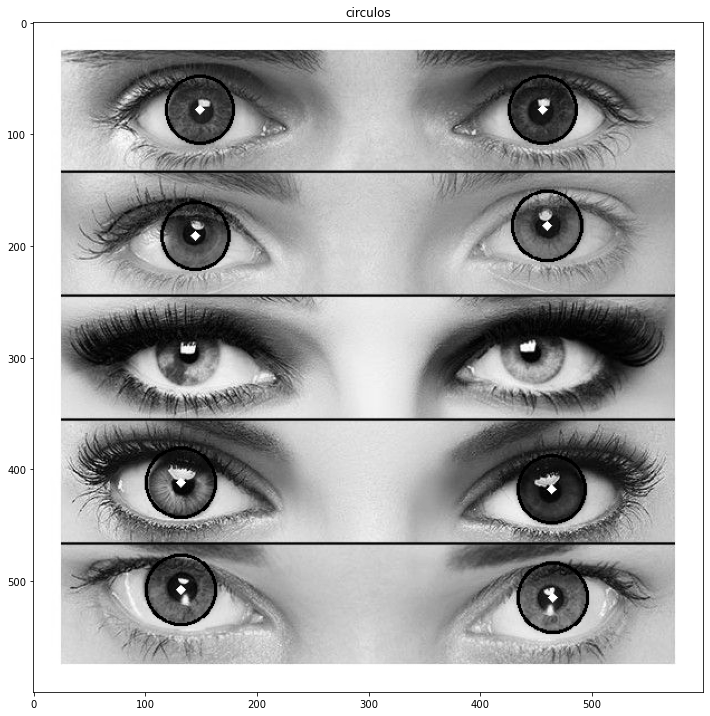

In [5]:
# Iris
#img=img.copy()
pupilas=img.copy()
pupilas=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
circulos =cv.HoughCircles(img_gray,cv.HOUGH_GRADIENT,1.21,minDist=45,param1=110,param2=25,minRadius=30,maxRadius=32)
circulos = np.uint16(np.around(circulos))

for a in circulos[0,:]:
    cv.circle(pupilas,(a[0],a[1]),a[2],(0,0,255),2) #circulo alrededor de la pupila
    cv.circle(pupilas,(a[0],a[1]),2,(255,0,0),3) #punto en centro de pupila


#Distancia entre Iris
distancia=[]
circulos = circulos.reshape(8,3).astype('int')
circulos_coordenadas=circulos[circulos[:,1].argsort()]
circulos_coordenadas=np.delete(circulos_coordenadas,2,axis=1)
j=0
for a in range(0,circulos_coordenadas.shape[0],2):
    distancia.append(np.sqrt(np.sum(circulos_coordenadas[a+1]-circulos_coordenadas[a])**2))
    print('Distancia ', j+1, ' en pixeles entre iris = ', distancia[j].astype('int'))
    j=j+1
    
figura = plt.figure(figsize = (12,20))
plt.title('circulos')
plt.imshow(pupilas,cmap='gray')
#cv.imshow('circulos',img)
#cv.waitKey(0)
#cv.destroyAllWindows()

Distancia  1  en pixeles entre pupilas =  302
Distancia  2  en pixeles entre pupilas =  309
Distancia  3  en pixeles entre pupilas =  170
Distancia  4  en pixeles entre pupilas =  245


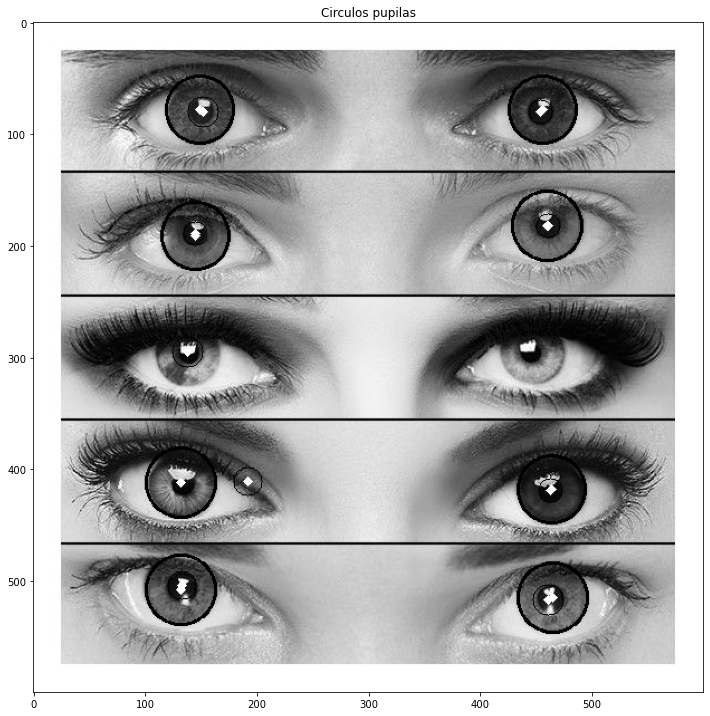

In [6]:
#Pupila
circulos_pupila = cv.HoughCircles(img_gray,cv.HOUGH_GRADIENT,1.2408,minDist=80,param1=80,param2=24,minRadius=9,maxRadius=15)
circulos_pupila = np.uint16(np.around(circulos_pupila))
for b in circulos_pupila[0,:]:
    cv.circle(pupilas,(b[0],b[1]),b[2],(0,0,255),1) #circulo alrededor de la pupila
    cv.circle(pupilas,(b[0],b[1]),2,(255,0,0),3) #punto en centro de pupila

#Distancia entre pupilas
distancia=[]
circulos_pupila = circulos_pupila.reshape(9,3).astype('int')
circulos_coordenadas=circulos_pupila[circulos_pupila[:,1].argsort()]
circulos_coordenadas=np.delete(circulos_coordenadas,2,axis=1)
j=0
for a in range(0,circulos_coordenadas.shape[0]-1,2): #tuve que sacarle 1 para evitar que uno ojo quede solo...
    distancia.append(np.sqrt(np.sum(circulos_coordenadas[a+1]-circulos_coordenadas[a])**2))
    print('Distancia ', j+1, ' en pixeles entre pupilas = ', distancia[j].astype('int'))
    j=j+1


figura = plt.figure(figsize = (12,20))
plt.title('Circulos pupilas')
plt.imshow(pupilas,cmap='gray')    
    
#cv.imshow('circulos_pupilas',pupilas)
#cv.waitKey(0)
#cv.destroyAllWindows()